# Predicting Sedentary Lifestyle During

## Importing packages

In [2]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.93 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.46 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.43 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.63 seconds)
Iteration 200: error is 57.596822 (50 iterations in 0.68 seconds)
Iteration 250: error is 57.596830 (50 iterations in 0.85 seconds)
Iteration 300: error is 2.314829 (50 iterations in 0.80 seconds)
Iteration 350: error is 1.307825 (50 iterations in 0.37 seconds)
Iteration 400: error is 1.264104 (50 iterations in 0.31 seconds)
Iteration 450: error is 1.259163 (50 iterations in 0.28 seconds)
Iteration 500: error is 1.254181 (50 iterations in 0.31 seconds)
Iteration 550: error is 1.251289 (50 iterations in 0.29 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

## Outliers

### Outlier: Strange Dont Practice

In [3]:
sedentery_dataset_copy <- sedentary_dataset
sedentery_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances_sdp, sedentery_dataset_copy, "sedentary_time_range_during")

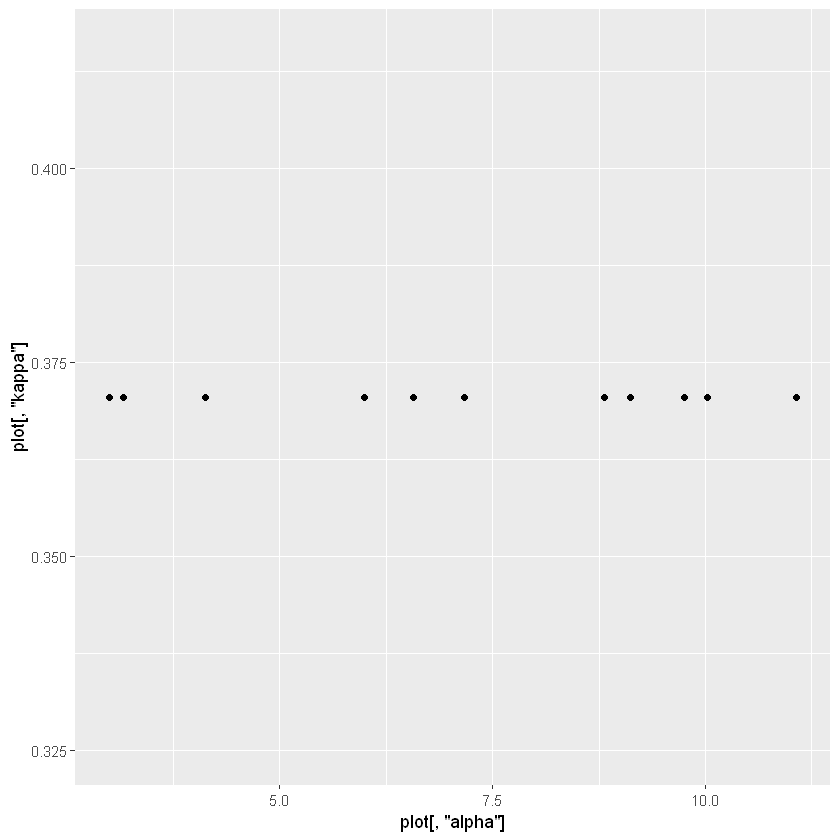

In [4]:
plot <- outliers_result$kappa_x_alpha

ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

### Outlier: Strange Practice

In [5]:
sedentary_dataset_copy <- sedentary_dataset
sedentary_dataset_copy["outlier"] <- strange_p
outliers_result <- outliers_checker(distances_sp, sedentary_dataset_copy, "sedentary_time_range_during")

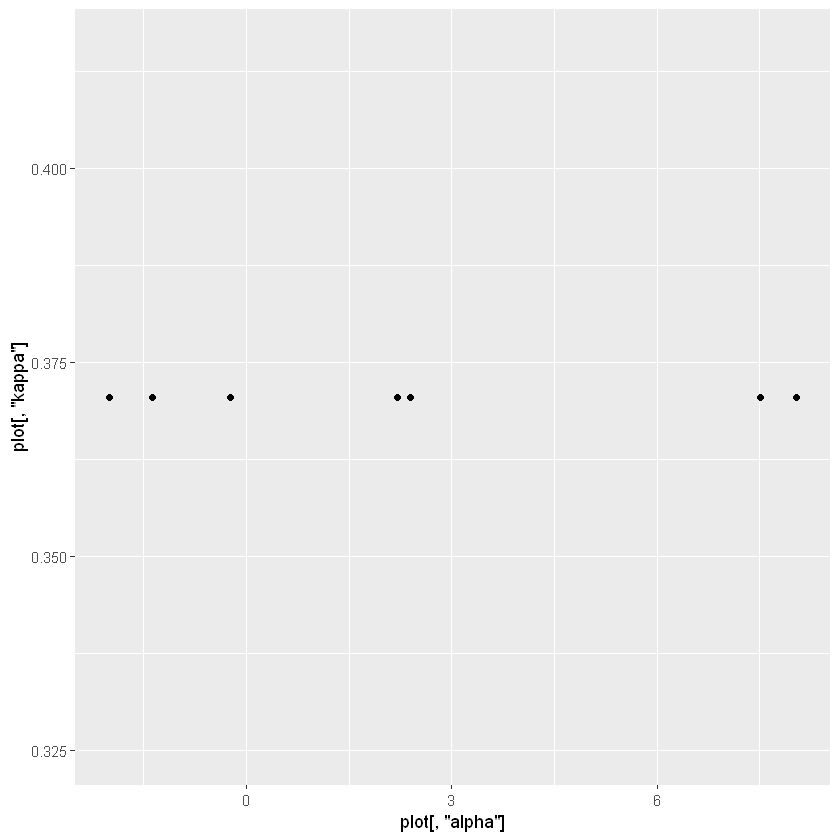

In [6]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

### New Train and Test

In [7]:
sedentary_train <- outliers_result$best_model$train
sedentary_test <- outliers_result$best_model$test

## Models

In [8]:
table(sedentary_dataset[, "sedentary_time_range_during"])


   8_hour_or_more less_then_8_hours 
              437               805 

### Applying augmentation into the training set

In [9]:
sedentary_train.aug <- data_augmentation(
    train_data=sedentary_train,
    yname="sedentary_time_range_during",
    maj_class = "less_then_8_hours",
    min_classes = c("8_hour_or_more"),
    ycol=match("sedentary_time_range_during",names(sedentary_dataset))
)

table(sedentary_train.aug[, "sedentary_time_range_during"])



   8_hour_or_more less_then_8_hours 
              564               564 

### Decision Tree: Kappa metric without augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                67                38
  less_then_8_hours             64               203
                                          
               Accuracy : 0.7258          
                 95% CI : (0.6774, 0.7705)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0008209       
                                          
                  Kappa : 0.3706          
                                          
 Mcnemar's Test P-Value : 0.0133099       
                                          
            Sensitivity : 0.5115          
            Specificity : 0.8423          
         Pos Pred Value : 0.6381          
         Neg Pred Value : 0.7603          
             Prevalence : 0.3522          
         Detection Rate : 0.1801          
   Detection Prevalence : 0.2823          
      Balanced Accuracy : 0.6769          
     

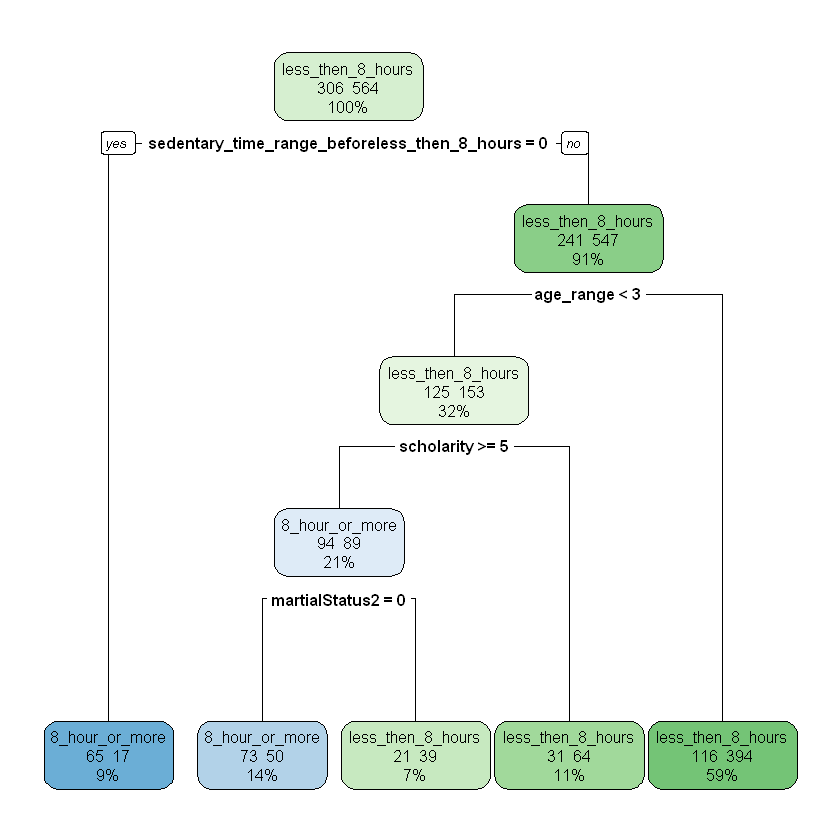

In [10]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### Decision Tree: Accuracy metric with augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                42                 8
  less_then_8_hours             89               233
                                          
               Accuracy : 0.7392          
                 95% CI : (0.6915, 0.7831)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0001008       
                                          
                  Kappa : 0.3346          
                                          
 Mcnemar's Test P-Value : 4.557e-16       
                                          
            Sensitivity : 0.3206          
            Specificity : 0.9668          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.7236          
             Prevalence : 0.3522          
         Detection Rate : 0.1129          
   Detection Prevalence : 0.1344          
      Balanced Accuracy : 0.6437          
     

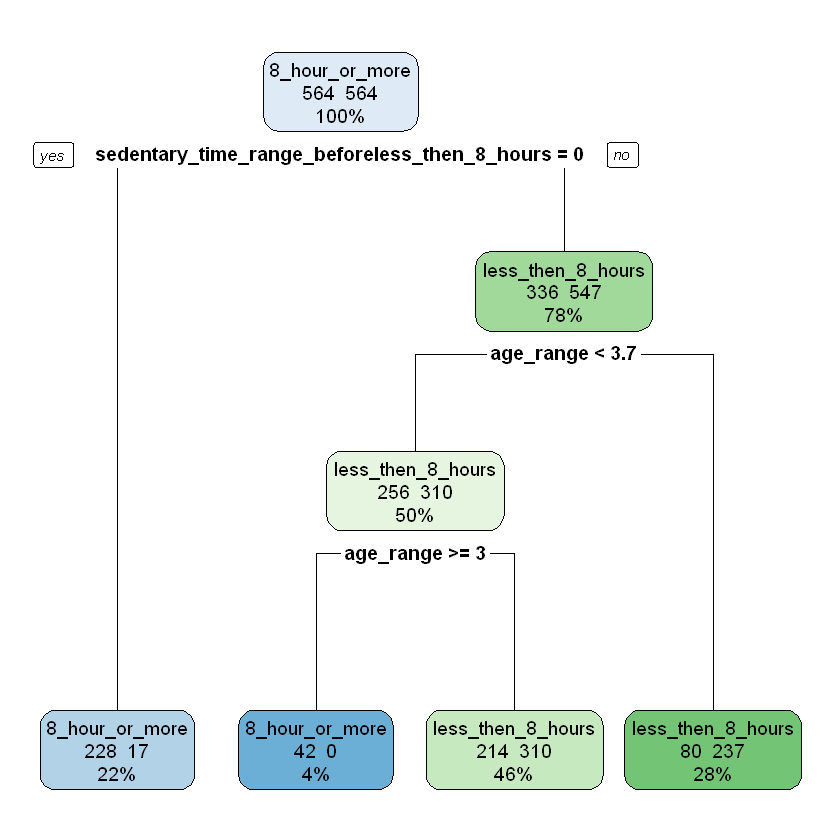

In [11]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### RF: Kappa metric without augmentation

In [12]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                74                25
  less_then_8_hours             57               216
                                         
               Accuracy : 0.7796         
                 95% CI : (0.734, 0.8207)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 2.403e-08      
                                         
                  Kappa : 0.4884         
                                         
 Mcnemar's Test P-Value : 0.0006185      
                                         
            Sensitivity : 0.5649         
            Specificity : 0.8963         
         Pos Pred Value : 0.7475         
         Neg Pred Value : 0.7912         
             Prevalence : 0.3522         
         Detection Rate : 0.1989         
   Detection Prevalence : 0.2661         
      Balanced Accuracy : 0.7306         
                       

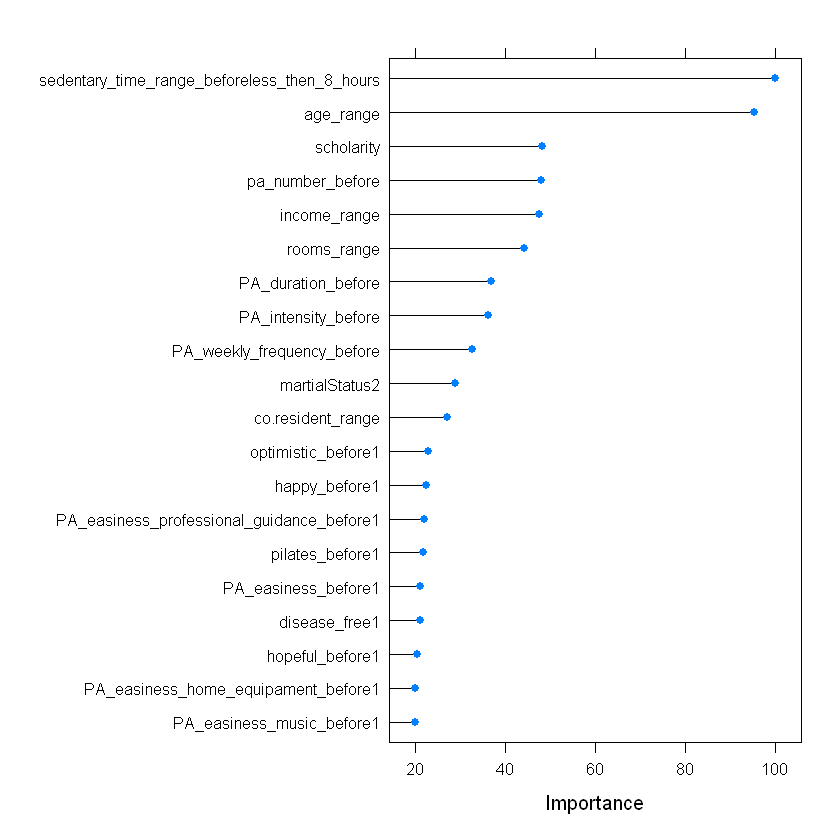

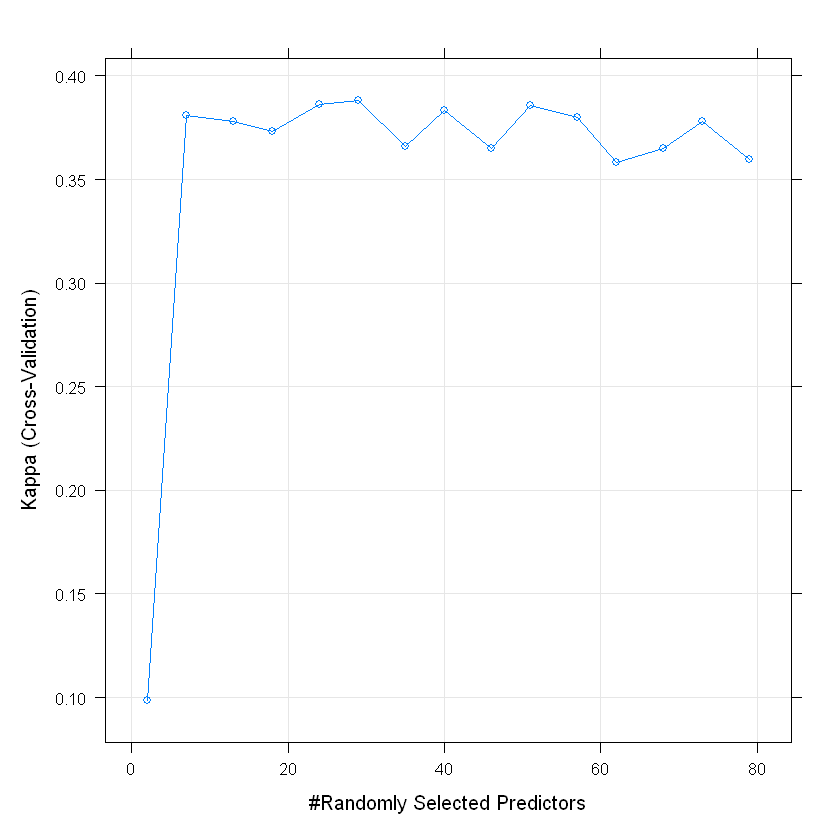

In [13]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Accuracy metric with augmentation

In [14]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                73                24
  less_then_8_hours             58               217
                                         
               Accuracy : 0.7796         
                 95% CI : (0.734, 0.8207)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 2.403e-08      
                                         
                  Kappa : 0.4865         
                                         
 Mcnemar's Test P-Value : 0.0002682      
                                         
            Sensitivity : 0.5573         
            Specificity : 0.9004         
         Pos Pred Value : 0.7526         
         Neg Pred Value : 0.7891         
             Prevalence : 0.3522         
         Detection Rate : 0.1962         
   Detection Prevalence : 0.2608         
      Balanced Accuracy : 0.7288         
                       

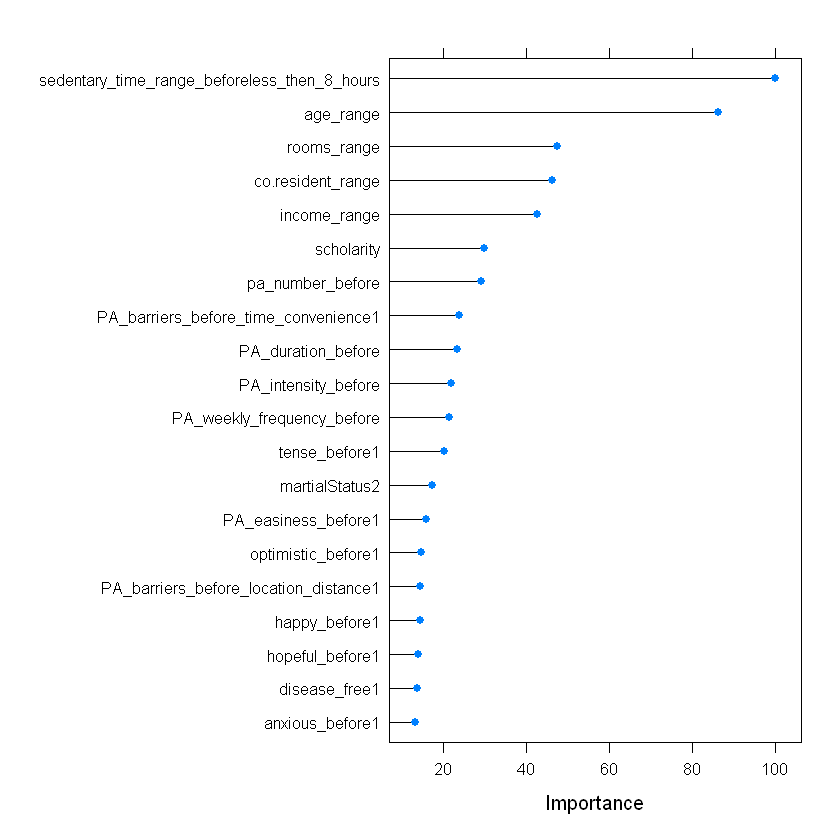

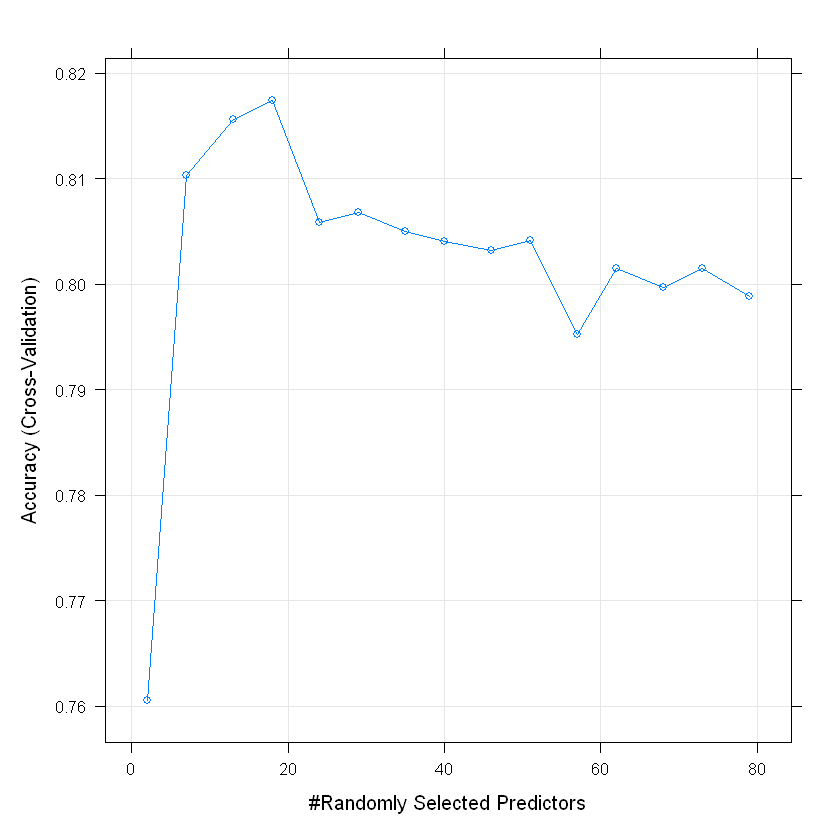

In [15]:
plot(varImp(model$result), top=20)
plot(model$result)
